# Práctica 2.  Regresión logística y descenso de gradiente

####  Isabel Afán de Ribera

#### 13/11/2020

## Objetivo

El objetivo perseguido en esta práctica es programar el descenso de gradiente con Python explicando paso a paso el proceso seguido para ello.

## Introducción

El descenso de gradiente es un algoritmo de optimización empleado para encontrar el mínimo de una función. En el ámbito del Machine Learning, en concreto, se utiliza para encontrar los valores de los parámetros (pesos) de una función coste que minimicen el coste. Para ello se irá minimizando la función coste moviéndose iterativamente en la dirección del descenso más pronunciado según lo definido por la pendiente negativa del gradiente.

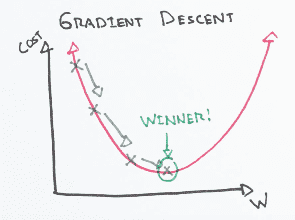

## Descenso de gradiente

### Importación de librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

### Carga de datos

Para programar el descenso de gradiente vamos a utilizar una base de datos relativa a los datos históricos de las puntuaciones de dos exámenes de acceso a la universidad de 100 aspirantes de años anteriores que fueron o no admitidos. El objetivo con estos datos es conocer la posibilidad de los nuevos aspirantes de ser admitidos en función de la puntuación obtenida en los exámenes.

In [2]:
# cargamos los datos
data = pd.read_csv('./data/4_1_data.csv')
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# renombramos las variables
data = data.rename(columns={"score-1" : "score1", "score-2" : "score2"})
data.head()

,score1,score2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# creamos dos matrices X e y a las que asignamos valores para posteriormente poder representar
X = data.iloc[:,:-1].values
# la X contiene un array con las puntuaciones de los 2 examenes de cada aspirante
y = data.iloc[:,-1].values
# la y (variable dependiente categorica) contiene un array con los valores de la columna label, la cual nos indica si el 
# aspirante fue o no admitido (1-si obtuvo la admisión, 0-en caso contrario)

### Visualizando los datos

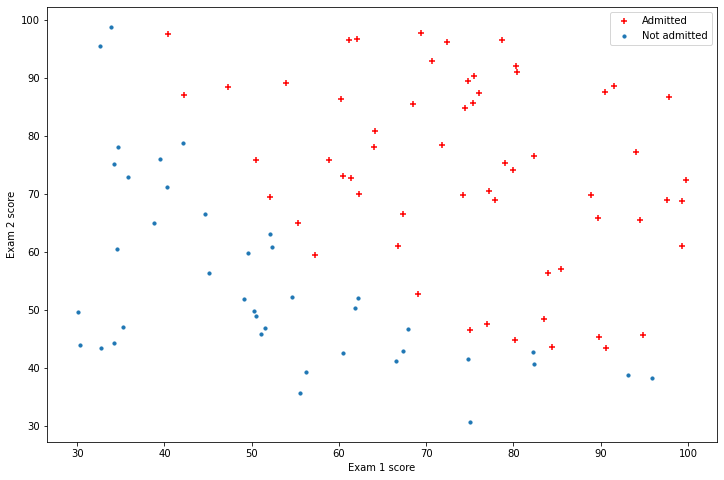

In [5]:
# mediante un grafico de dispersion visualizamos los dos grupos de clasificacion (ser o no ser admitido)
# de esta manera realizamos una clasificacion binaria, clasificando los elementos en dos grupos prediciendo 
# a cual pertenece cada uno
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)          # las matrices han de tener la misma dimension
plt.figure(figsize = (12,8))
plt.scatter(X[pos[:,0],0], X[pos[:,0],1], c = "red", marker = "+") # puntuaciones positivas, llevan a ser admitido
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], marker = "o", s = 10)    # puntuaciones negativas, llevan a no ser admitido
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

### Regresión logística

En primer lugar, es importante comentar que la regresión logísitca es uno de los algoritmos de aprendizaje automático más simples y comúnmente utilizados para resolver problemas de clasificación binaria pues esta describe y estima la relación entre una variable binaria dependiente y las variables independientes. Para proceder con este método lo primero que debemos hacer es aprender a implementar la función sigmoidea.

La función sigmoidea o logística definida como (1/(1 + e^-x)) es una función que da una curva en forma de 'S' que puede tomar cualquier número de valor real y asignarlo a un valor entre 0 y 1. Si la curva va a infinito positivo, y predicho se convertirá en 1, y si la curva va a infinito negativo, y predicho se convertirá en 0. Si la salida de la función sigmoidea es mayor que 0.5, podemos clasificar el resultado como 1 o sí, y si es menor que 0.5, podemos clasificarlo como 0 o no.

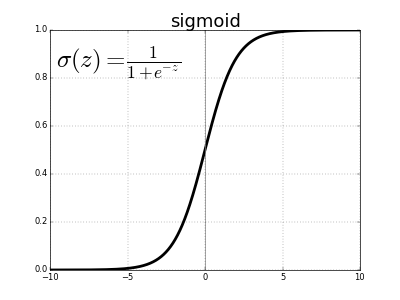

In [6]:
# definimos la función
def sigmoid(z):
    """
    return the sigmoid of z
    """
    return 1 / (1 + np.exp(-z)) 

In [7]:
# comprobamos con un valor cualquiera la función sigmoidea
sigmoid(0)

0.5

### Función de coste

Mediante el método de descenso de gradiente vamos a minimizar la función que mide el error de predicción del modelo en el conjunto de datos, dicha función de error se conoce como función de coste. Gracias a esta función podemos saber cómo de bueno es nuestro modelo haciendo predicciones para un conjunto dado de parámetros. La función de coste tiene como objetivo encontrar el peso de los valores que minimizan el coste, y esto se consigue a través de derivadas parciales.

La función costo siempre toma tres parámetros: theta, X e y donde theta es la posición incial, X el vector de filas e y un vector categórico. Y su objetivo es encontrar la w y la b que minimizan el coste a través de derivadas parciales.

In [8]:
# se define la funcion costo junto con sus parametros
def costFunction(theta, X, y):    
    """
    Takes in numpy array theta, X and y and return the logistic regression cost function and gradient
    """
    
    # longitud del vector categorico
    m = len(y)  
    
    # defino predicciones con la funcion sigmoidea y el producto escalar de las matrices X y theta
    predictions = sigmoid(np.dot(X,theta))  
    # defino error como resultado del logaritmo de la prediccion
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions)) 
    cost = 1/m * sum(error)
    
    # donde X transpose es la matriz transpuesta del vector de filas 
    grad = 1/m * np.dot(X.transpose(),(predictions - y))  
    
    return cost[0] , grad

### Normalización de las variables

Algunos algoritmos de aprendizaje automático, como en este caso la regresión logística, que utilizan el descenso de gradientes como técnica de optimización requieren que los datos se escalen. La variable X al estar dentro de la fórmula del descenso de gradiente afectará al tamaño del paso del descenso. Para garantizar que este se mueva suavemente hacia los mínimos y que los pasos se actualicen al mismo ritmo para todas las variables, es necesario escalar los datos antes de introducirlos en el modelo.


Vamos a realizar el escalado mediante la normalización de la media, esta distribución tomará valores entre -1 y 1 con una media igual a 0.

In [9]:
def featureNormalization(X):  
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    # media de la matrix X
    mean = np.mean(X,axis=0) 
    # desviacion estandar de la matriz X
    std = np.std(X,axis=0)    
    
    # matriz X normalizada 
    X_norm = (X - mean) / std  
    
    return X_norm , mean , std

In [10]:
m , n = X.shape[0], X.shape[1]  
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
# configuramos el initial theta o poscion inicial
initial_theta = np.zeros((n+1,1))    
 # calculamos el coste de esa posicion inicial y el gradiente en esa poscion inicial
cost, grad= costFunction(initial_theta,X,y) 
# resultado del coste
print("Cost of initial theta is",cost)  
 # resultado del gradiente 
print("Gradient at initial theta (zeros):",grad)   

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Función descenso de gradiente

El descenso de gradiente es un algoritmo que permite localizar un mínimo en una función de forma iterativa, en Machine Learning dicha función a minimizar es la función coste (definida anteriormente) que reduce la diferencia entre el modelo que buscamos y la salida que tiene que aprender. Las iteraciones se producen entre un valor actual y una posición, y cada nueva posición que obtenemos al dar pasos poco a poco se calcula con la posición actual menos un “paso” hacia la dirección de mayor descenso en esa posición. 

La función del descenso de gradiente tiene las entradas X (vector de filas), y (vector categórico), theta (posción), learning rate (tamaño de los pasos), número de iteraciones (número de pasos).

In [11]:
# definimos la funcion de gradiente para que minimize la funcion coste mediante derivada
def gradientDescent(X, y, theta, learning_rate, num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    # bucle que vaya calculando para cada iteracion el coste y el gradiente en cada posicion 
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (learning_rate * grad)
        J_history.append(cost)
    
    return theta , J_history

In [12]:
num_iters = 1500     # numero de iteraciones, hay que establecer un limite 
learning_rate = 0.01 # alpha, tamaño de los pasos

In [13]:
theta , J_history = gradientDescent(X, y, initial_theta, learning_rate, num_iters)

In [14]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[0.58119252]
 [1.56496775]
 [1.40767345]]
The cost of the optimized theta: 0.2805116931825666


Text(0.5, 1.0, 'Cost function using Gradient Descent')

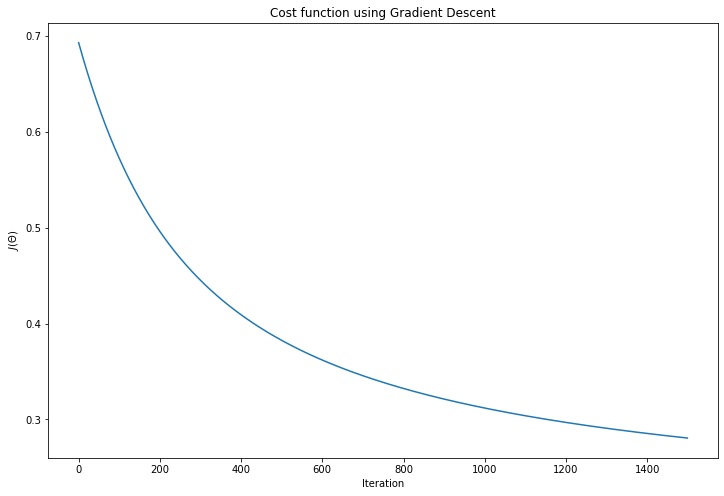

In [15]:
plt.figure(figsize = (12,8))
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Repetimos el cálculo del descenso de gradiente asignando un nuevo alpha o tamaño de los pasos pues con una tasa de aprendizaje del 0.01 vemos en la curva que conseguimos que el error se vaya minimizando pero puede ser que aumentando el tamaño de los pasos la curva sea más pronunciada y la función de costo se estabilice más. Vamos a probar con un learning rate de 0.2.

In [16]:
num_iters = 1500     # numero de iteraciones, hay que establecer un limite 
learning_rate = 0.2 # alpha, tamaño de los pasos

In [17]:
theta , J_history = gradientDescent(X, y, initial_theta, learning_rate, num_iters)

In [18]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.6076725 ]
 [3.75690491]
 [3.49692416]]
The cost of the optimized theta: 0.20386496797315143


Text(0.5, 1.0, 'Cost function using Gradient Descent')

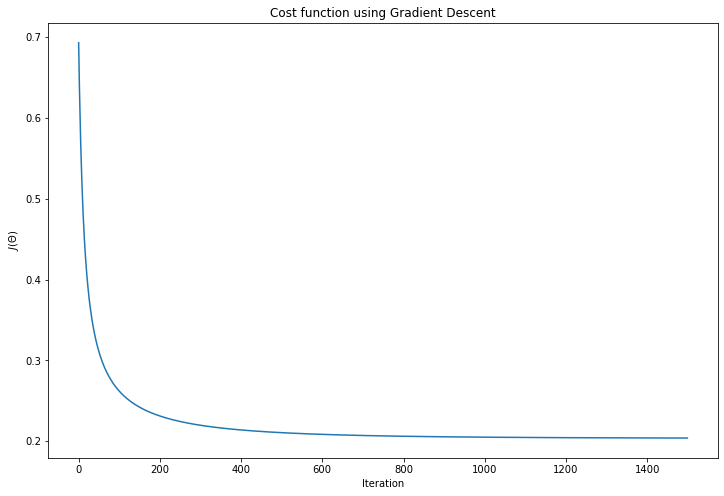

In [19]:
plt.figure(figsize = (12,8))
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

La curva va mejorando al aumentar el learning rate, caida más brusca y posterior estabilización de la función, el error esta bastante más próximo a cero. Por último, vamos a comprobar si con el alpha máximo de 1 (recordamos que alpha siempre esta entre 0 y 1).

In [20]:
num_iters = 1500     # numero de iteraciones, hay que establecer un limite 
learning_rate = 1 # alpha, tamaño de los pasos

In [21]:
theta , J_history = gradientDescent(X, y, initial_theta, learning_rate, num_iters)

In [22]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.71835438]
 [3.99258451]
 [3.72493998]]
The cost of the optimized theta: 0.20349770185912164


Text(0.5, 1.0, 'Cost function using Gradient Descent')

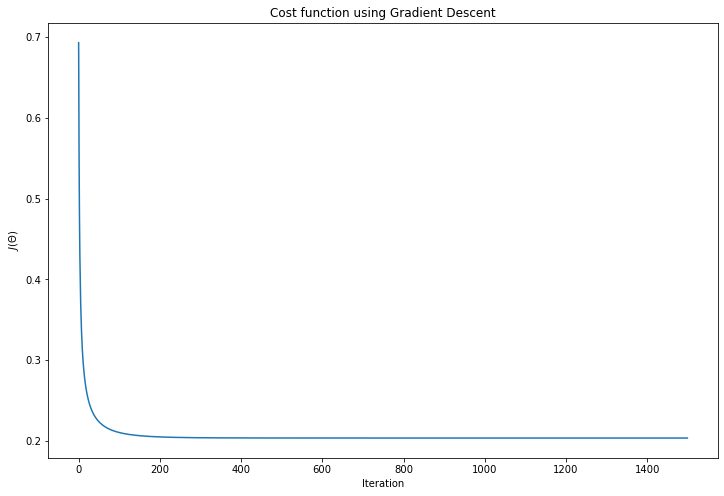

In [23]:
plt.figure(figsize = (12,8))
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

En la tasa de aprendizaje máxima, es decir, de 1 y unas iteraciones de 1500 la función de costo se estabiliza alrededor de las 200 iteraciones con una caída muy pronunciada. En este punto el theta optimizado por el descenso de gradiente es de [1.71835438] [3.99258451] [3.72493998] y el costo de theta optimizado 0.2034. Una mejora considerable con respecto al costo del theta inicial de 0.693.

## Referencias

* Balsys, r (2019). Understanding Logistic Regression (2019). Disponible en: https://pylessons.com/Logistic-Regression-part1/
* Descenso por gradiente (Gradient descent). Disponible en: https://turing.iimas.unam.mx/~ivanvladimir/posts/gradient_descent/
* Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization. Disponible en: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
* Rodríguez, D (2018). Implementación del método descenso del gradiente en Python. Disponible en: https://www.analyticslane.com/2018/12/21/implementacion-del-metodo-descenso-del-gradiente-en-python/#:~:text=El%20m%C3%A9todo%20del%20descenso%20del,en%20el%20conjunto%20de%20datos.
* Gradient descent. Disponible en: https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
* Machine Learning Logistic Regression. Disponible en: https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb